#EDA(Exploratory Data Analysis) Assignment

##Bike Dataset
###name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
####selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
###year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
###seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
###owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
###km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
###ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

####1.What is the range of selling prices in the dataset?

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df_bike=pd.read_csv('/content/drive/MyDrive/Datasets/BIKE DETAILS.csv')
df_bike.shape
df_bike.info()
df_bike.isnull().sum()
min_price=df_bike['selling_price'].min()
max_price=df_bike['selling_price'].max()
print(f'The range of selling prices in the dataset is {min_price} to {max_price}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
The range of selling prices in the dataset is 5000 to 760000


####2) What is the median selling price for bikes in the dataset.

In [ ]:
print(f" Median selling price for the bikes is: {df_bike['selling_price'].median()}")

 Median selling price for the bikes is: 45000.0


####3).What is the most common seller type

In [ ]:
print(f"Most common seller for the Bikes dataset is {df_bike['seller_type'].mode()}")

Most common seller for the Bikes dataset is 0    Individual
Name: seller_type, dtype: object


####4).How many bikes have driven more than 50,000 kilometers

In [ ]:
print(f"{df_bike[df_bike['km_driven'] > 50000]['km_driven'].count()} bikes have driven more than 50,000 kilometers")

170 bikes have driven more than 50,000 kilometers


####5) What is the average km_driven value for each ownership type

In [ ]:
print(f"The average km_driven value for each ownership type is: \n{df_bike.groupby('owner')['km_driven'].mean()}")

The average km_driven value for each ownership type is: 
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


####6)What proportion of bikes are from the year 2015 or older

In [4]:
df_bike.sample(2)
proportion=(df_bike[df_bike['year']<=2015].value_counts().sum()/df_bike['year'].value_counts().sum())*100
print(f"The proportion of bikes are from the year 2015 or older is: {proportion}")

The proportion of bikes are from the year 2015 or older is: 31.196983977379833


####7)What is the trend of missing values across the dataset?

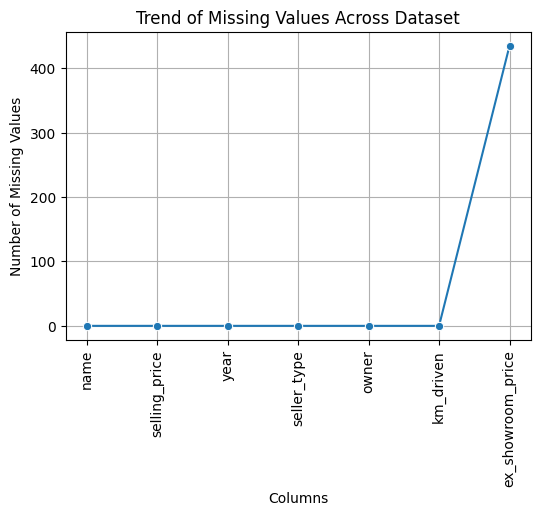

In [ ]:
missing_values = df_bike.isnull().sum()
# Create a line plot directly
plt.figure(figsize=(6, 4))
sns.lineplot(data=missing_values, marker='o')
plt.title('Trend of Missing Values Across Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
#Insight>> we can see uptrend line in Ex-Showroom_price, means we have more missing values in ex_showroom_price call.

####8) What is the highest ex_showroom_price recorded, and for which bike###

In [5]:
highest_exshowroom_price=df_bike['ex_showroom_price'].max()
print(f"The highest showroom price recorded for the bike:{df_bike[df_bike['ex_showroom_price']==df_bike['ex_showroom_price'].max()]}")


The highest showroom price recorded for the bike:                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


####9)What is the total number of bikes listed by each seller type

In [6]:
df_bike.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


####10)What is the relationship between selling_price and km_driven for first-owner bikes

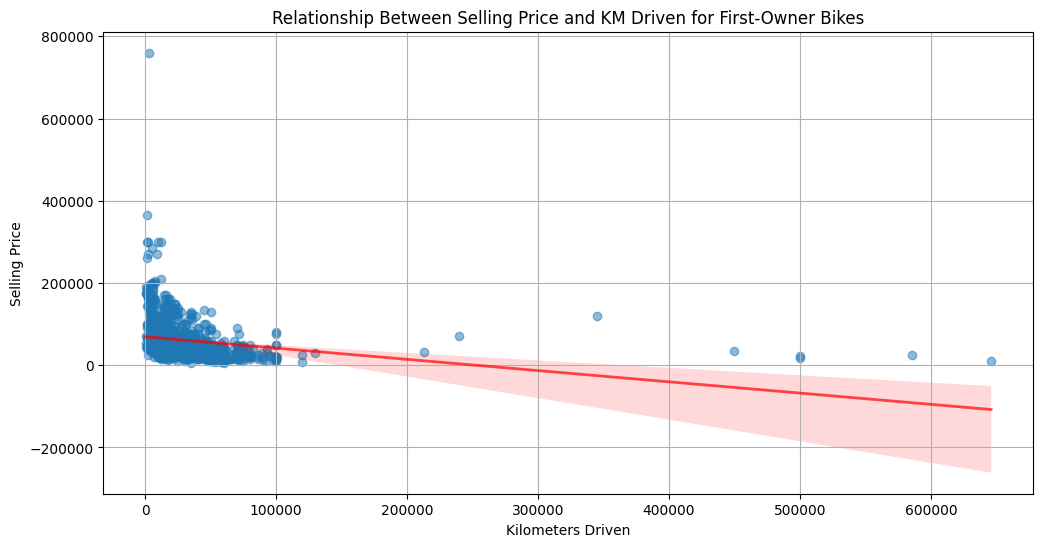

In [9]:
first_owner_bike = df_bike[df_bike['owner'] == '1st owner']
first_owner_bike.head()
plt.figure(figsize=(12, 6))
sns.regplot(x='km_driven', y='selling_price', data=first_owner_bike, scatter_kws={'alpha':0.5}, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Relationship Between Selling Price and KM Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [ ]:
#Insight>> Most of the first_owner bikers drove less than one lakh kilometers, and interested their bike after 1 lakh kilometers_drive.
#Insight2>> As many kilometers as the bike drove , the selling price signinficantly dropped.

####11)Identify and remove outliers in the km_driven column using the IQR method

In [37]:
Q1, Q3 = df_bike['km_driven'].quantile([0.25, 0.75])
#print(Q1,Q3)
IQR=Q3-Q1
print(IQR)
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_bike_no_outliers = df_bike[(df_bike['km_driven'] >= lower_limit) & (df_bike['km_driven'] <= upper_limit)]

# Verify the changes
print(df_bike_no_outliers.shape)
print(df_bike_no_outliers.head())

# Assign the filtered DataFrame back to the original DataFrame
df_bike = df_bike_no_outliers

# Check value counts for the 'km_driven' column
print(df_bike['km_driven'].value_counts())

29500.0
(1022, 7)
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
km_driven
20000    39
40000    38
50000    37
25000    31
30000    28
         ..
20477     1
35700     1
3246      1
4050      1
53000     1
Name: count, Length: 283, dtype: int64


####12)Perform a bivariate analysis to visualize the relationship between year and selling_price

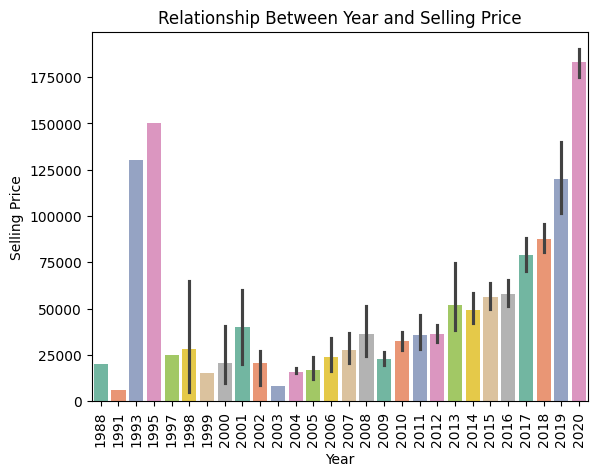

In [42]:
sns.barplot(x='year', y='selling_price', data=df_bike, palette='Set2')
plt.title('Relationship Between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

######Insight>> Selling price is in uptrend and and there are outliers.

####13)What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

In [44]:
df_bike.sample(2)

current_year = 2025
df_bike['bike_age'] = current_year - df_bike['year']
df_bike['depreciation'] = (df_bike['ex_showroom_price'] - df_bike['selling_price']) / df_bike['ex_showroom_price']

# Group by bike age and calculate the average depreciation
average_depreciation = df_bike.groupby('bike_age')['depreciation'].mean().reset_index()

# Rename columns for clarity
average_depreciation.columns = ['bike_age', 'average_depreciation']
print(average_depreciation)


    bike_age  average_depreciation
0          5             -0.219982
1          6              0.026919
2          7              0.137780
3          8              0.231345
4          9              0.340382
5         10              0.363292
6         11              0.386601
7         12              0.463560
8         13              0.527729
9         14              0.588782
10        15              0.574482
11        16              0.642029
12        17              0.703273
13        18              0.620810
14        19              0.771601
15        20              0.817691
16        21              0.671844
17        22                   NaN
18        23                   NaN
19        24              0.635382
20        25                   NaN
21        26                   NaN
22        27                   NaN
23        28                   NaN
24        30                   NaN
25        32                   NaN
26        34                   NaN
27        37        

####14)Which bike names are priced significantly above the average price for their manufacturing year

In [51]:
# Step 1: Group by Year and Calculate Average Selling Price
avg_price_by_year = df_bike.groupby('year')['selling_price'].mean()
df_bike['avg_price_by_year'] = df_bike['year'].map(avg_price_by_year)

# Step 2: Filter Bike Names by Comparing Selling Price to Average Selling Price
above_avg_price_bikes = df_bike[df_bike['selling_price'] > df_bike['avg_price_by_year']]
above_avg_price_bike_names = above_avg_price_bikes['name'].unique()
print("Bike which are priced Significantly above the average price for their manufacturing year ", above_avg_price_bike_names)

Bike which are priced Significantly above the average price for their manufacturing year  ['Royal Enfield Classic 350' 'Royal Enfield Classic Gunmetal Grey'
 'Yamaha Fazer FI V 2.0 [2016-2018]'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa 42'
 'Hero Honda Glamour' 'Yamaha YZF R15 S' 'Yamaha FZ25' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Yamaha FZ16' 'Royal Enfield Electra 5 S'
 'Hero Honda Passion Plus' 'Royal Enfield Bullet 350'
 'Bajaj Pulsar 150 [2001-2011]' 'Hero Xtreme Sports'
 'Honda CB Hornet 160R' 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Bajaj Pulsar AS200' 'Royal Enfield Thunderbird 350X'
 'Suzuki Intruder 150' 'Hero Honda Karizma ZMR [2010]'
 'Honda CB Unicorn 150' 'Hero Honda CD Deluxe'
 'Royal Enfield Classic Desert Storm' 'TVS Apache RTR 200 4V'
 'UM Renegade Commando' 'Royal Enfield Continental GT 650'
 'Honda Activa 3G' 'Harley-Davidson Street Bob'
 'KTM 390 Duke ABS [2013-2016]' 'K

In [50]:
above_avg_price_bikes.shape

(318, 11)

####15)Develop a correlation matrix for numeric columns and visualize it using a heatmap

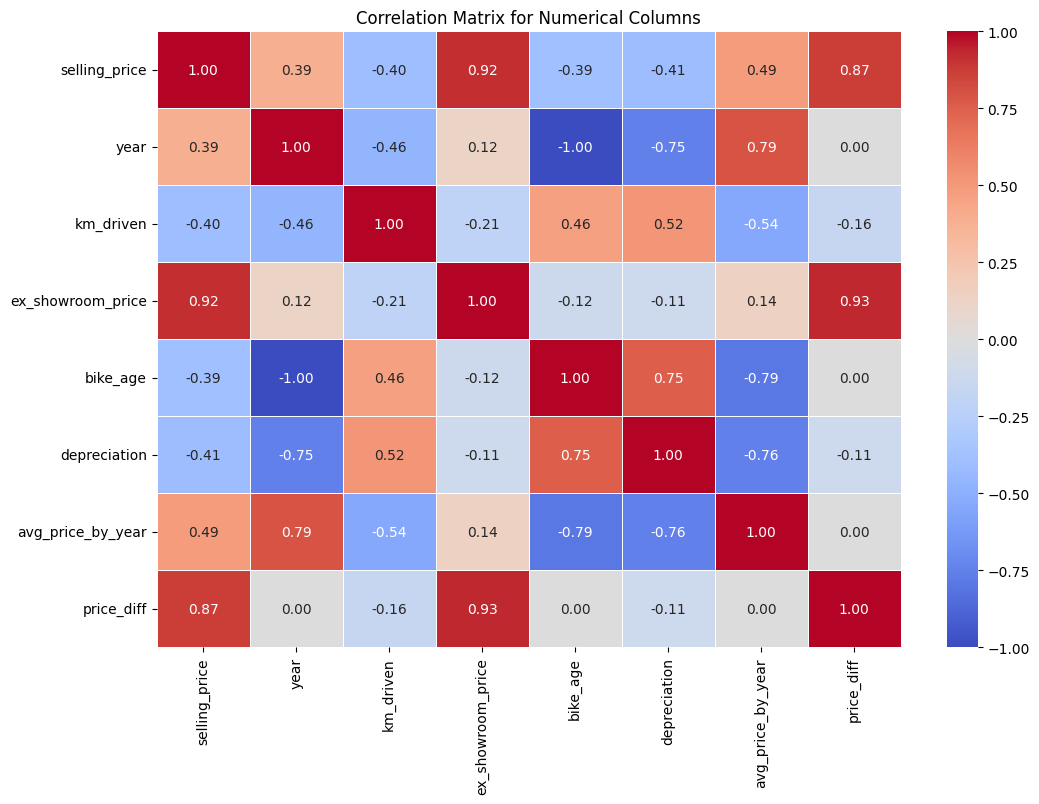

In [58]:
# Step 1: Select numerical columns
num_cols = df_bike.select_dtypes(exclude='object').columns
df_num = df_bike[num_cols]

# Step 2: Calculate the correlation matrix
corr_matrix = df_num.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()